<a href="https://colab.research.google.com/github/purshottamkumarr/Supervised_Learning_Project/blob/main/Medical_insurance_Predication(11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv("Medical_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [ ]:
data.shape

(2772, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\puru\AppData\Local\Temp\ipykernel_684\1452434102.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


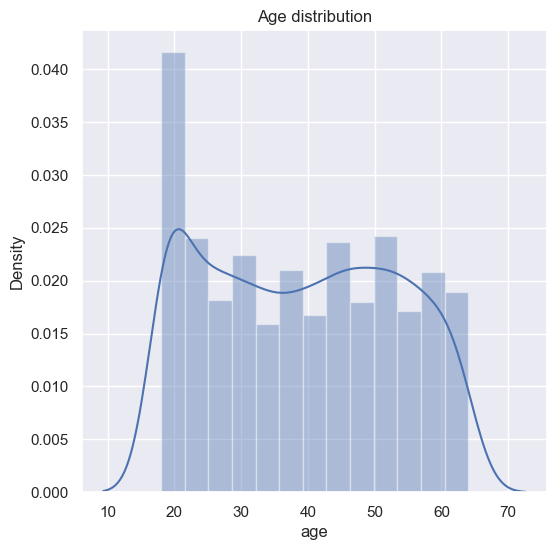

In [ ]:
## distibution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data["age"])
plt.title("Age distribution")
plt.show()

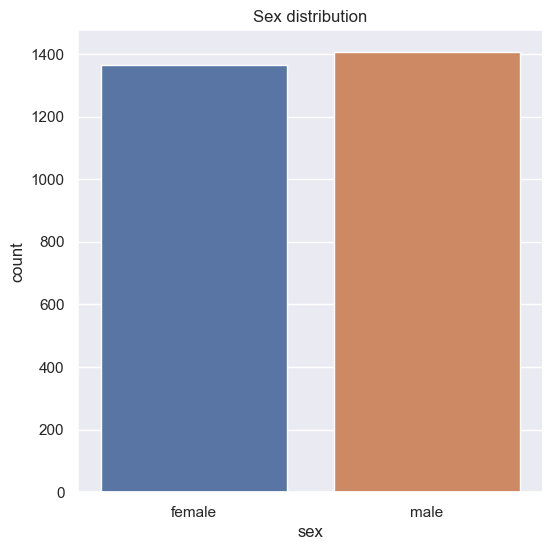

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = "sex",data = data)
plt.title("Sex distribution")
plt.show()

In [ ]:
data["sex"].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

In [ ]:
data["age"].value_counts()

age
18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
28     60
21     60
22     60
26     60
25     58
50     58
27     58
20     58
53     58
48     58
49     56
44     56
41     56
24     56
32     56
30     56
56     56
39     54
33     54
42     54
40     54
43     54
31     54
57     54
29     54
37     52
59     52
58     52
34     52
55     52
35     50
36     50
38     50
62     48
60     46
64     46
63     46
61     46
Name: count, dtype: int64

C:\Users\puru\AppData\Local\Temp\ipykernel_684\1174869107.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bmi"])


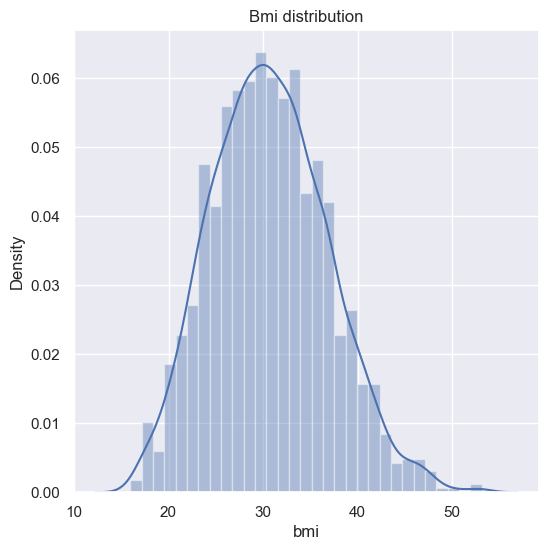

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data["bmi"])
plt.title("Bmi distribution")
plt.show()

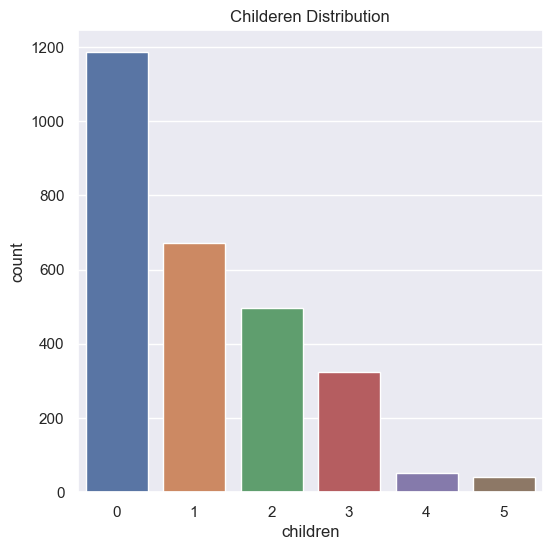

In [ ]:
## childern Columns
plt.figure(figsize = (6,6))
sns.countplot(x = "children",data=data)
plt.title("Childeren Distribution")
plt.show()

In [ ]:
data["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

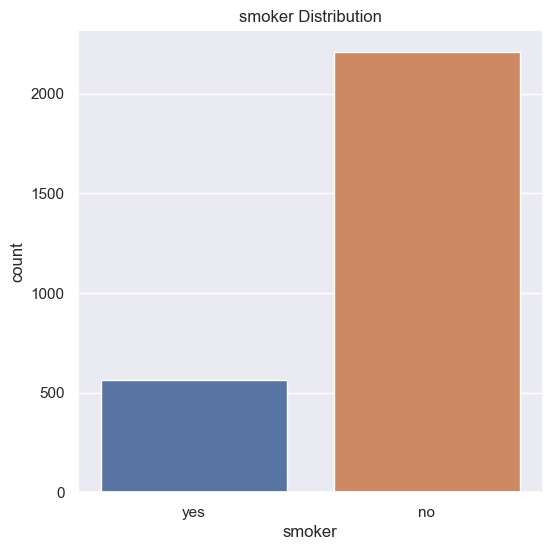

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = "smoker",data=data)
plt.title("smoker Distribution")
plt.show()

In [ ]:
data["smoker"].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

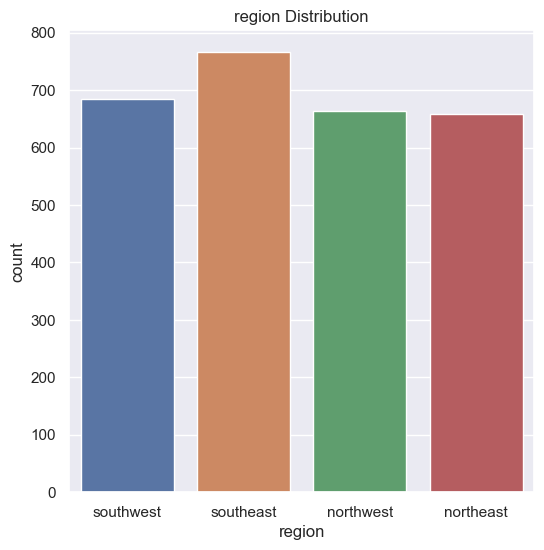

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = "region",data=data)
plt.title("region Distribution")
plt.show()

In [ ]:
data["region"].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

C:\Users\puru\AppData\Local\Temp\ipykernel_684\1416780889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["charges"])


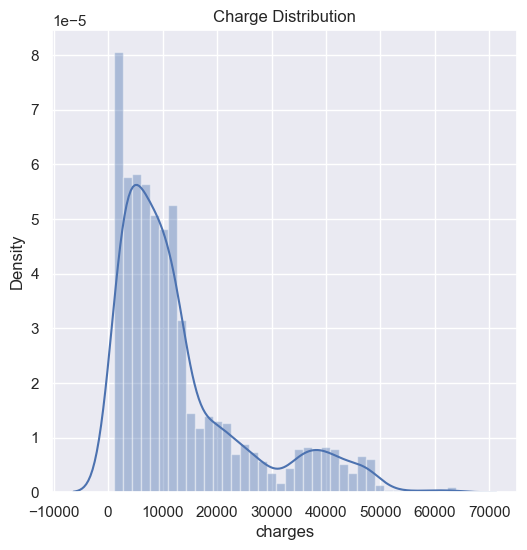

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data["charges"])
plt.title("Charge Distribution")
plt.show()

In [ ]:
data["charges"].value_counts()

charges
8798.59300     4
8569.86180     4
1633.96180     4
37607.52770    4
32108.66282    4
              ..
7512.26700     2
4762.32900     2
5910.94400     2
11454.02150    2
29141.36030    2
Name: count, Length: 1337, dtype: int64

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Encoding the sex categorial Columns

data.replace({"sex":{"male":0,"female":1}},inplace = True)

## Encoding the Smoker categoroal columns

data.replace({"smoker":{"yes":1,"no":0}},inplace = True)

## Encoding the Region Columns

data.replace({"region":{"southwest":1,"northwest":3, "northeast":2,"southeast":0}},inplace = True)

In [ ]:
# Spliting the data into x and  y

x = data.drop(columns = "charges",axis = 1)
y = data["charges"]

print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       0       0
2768   21    1  34.600         0       0       1
2769   19    0  26.030         1       1       3
2770   23    0  18.715         0       0       3
2771   54    0  31.600         0       0       1

[2772 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2772, 6) (2217, 6) (555, 6)


In [ ]:
Regressor = LinearRegression()

Regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
## Predication on the data
x_train_data = Regressor.predict(x_train)
print(x_train_data)

[32061.18094673  7211.09525956 11201.55568012 ...  7373.87545981
  5847.95872607  2446.35448492]


In [ ]:
r_square_data = metrics.r2_score(x_train_data,y_train)
print(r_square_data)

0.6775880397114917


In [ ]:
input_data = (28,0,33.000,3,0,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Regressor.predict(input_data_reshaped)

print(prediction)

[6746.46974787]


C:\Users\puru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction[0]==6746.46974787):
    print("Person taken Medical Insurance")
else:
    print("Person not taken Medical Insurance")

Person not taken Medical Insurance
